In [1]:
# Uncertainty quantification for regression problem
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from mapie.regression import MapieRegressor

In [23]:
X, y = make_regression(n_samples=500, n_features=1)
y = y + np.random.normal(size = len(y),scale=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

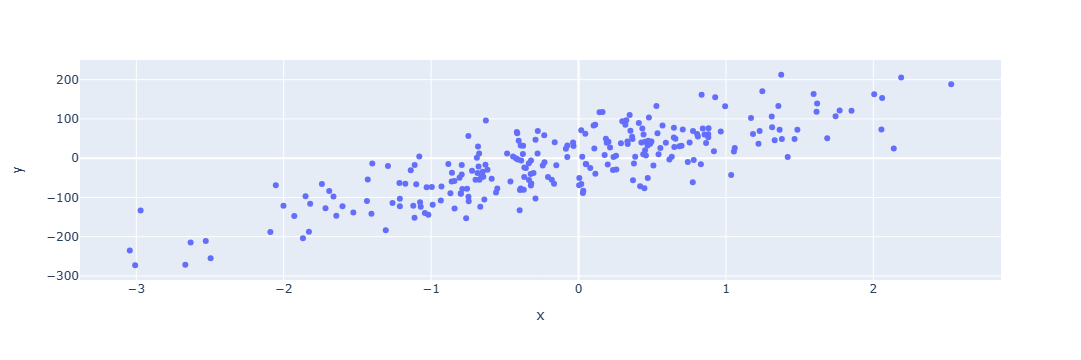

In [24]:
import plotly.express as px
fig = px.scatter(x=[ x[0] for x in X_train], y=y_train)
fig.show()

In [25]:
regressor = LinearRegression()

mapie_regressor = MapieRegressor(estimator=regressor, method='plus', cv=5)

mapie_regressor = mapie_regressor.fit(X_train, y_train)
y_pred, y_pis = mapie_regressor.predict(X_test, alpha=[0.01, 0.05, 0.32, 0.99])

In [26]:
import pandas as pd

In [27]:
y_pred[123]

-10.036231990176395

In [28]:
tmp = pd.DataFrame(y_pis[123])

In [29]:
tmp.mean()

0   -10.522353
1   -10.403677
2    -9.445030
3    -9.970965
dtype: float64

In [41]:
tmp = pd.DataFrame({
    "X" : [x[0] for x in X_test],
    "real": y_test,
    "y_pred" : y_pred,
    "low" : [x[0][1] for x in y_pis],
    "high" : [x[1][1] for x in y_pis]
})

tmp = tmp.sort_values("X")

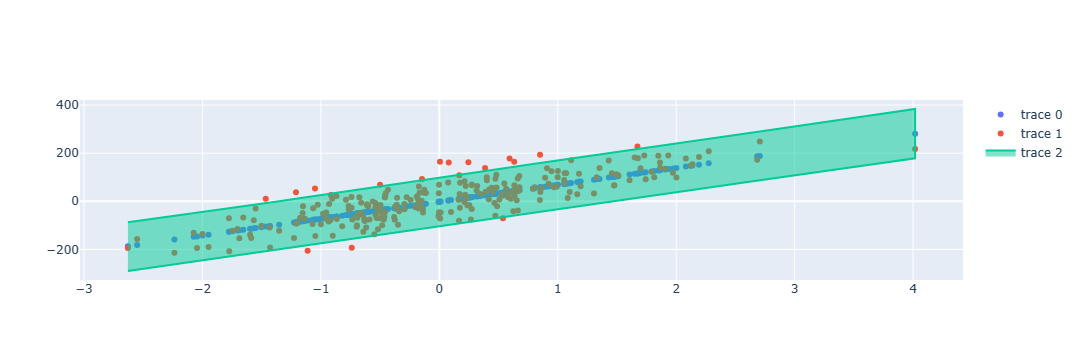

In [42]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=tmp["X"],
                         y=tmp["y_pred"],
                         mode = "markers" ))

fig.add_trace(go.Scatter(x=tmp["X"],
                         y=tmp["real"],
                         mode = "markers" ))

fig.add_trace(go.Scatter(x=list(tmp["X"])+list(tmp["X"][::-1]), 
                         y=list(tmp.low) + list(tmp.high[::-1]),
                    fill='toself'))
fig.show()

In [44]:
np.mean((tmp.real < tmp.low) | (tmp.real > tmp.high))

0.064

---------

In [45]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from mapie.classification import MapieClassifier

In [47]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [52]:
tmp = pd.DataFrame(X_train).assign(y = y_train)

In [61]:
tmp.y.value_counts()

y
1    89
0    83
2    78
Name: count, dtype: int64

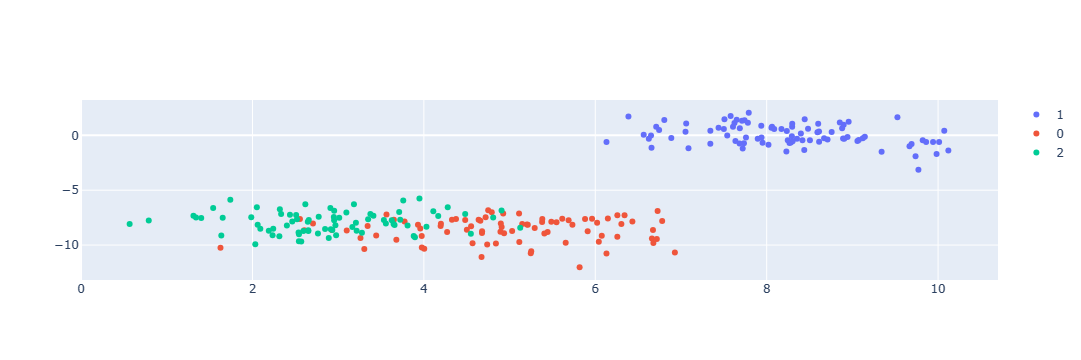

In [67]:
fig = go.Figure()

for i,s in tmp.y.value_counts().items():
    
    fig.add_trace(go.Scatter(x=tmp.loc[:,1][tmp.y == i],
                         y=tmp.loc[:,0][tmp.y == i],
                         name = str(i),    
                         mode = "markers" ))
fig.show()

In [72]:
classifier = LogisticRegression()

mapie_classifier = MapieClassifier(estimator=classifier, method='score', cv=5)

mapie_classifier = mapie_classifier.fit(X_train, y_train)
y_pred, y_pis = mapie_classifier.predict(X_test, alpha=[0.05])

In [79]:
tmp = pd.DataFrame(X_test).assign(y = y_test)

In [88]:
tmp["color"] = [str(x)+str(y)+str(z) for x,y,z in zip(y_test, y_pred, y_pis)]

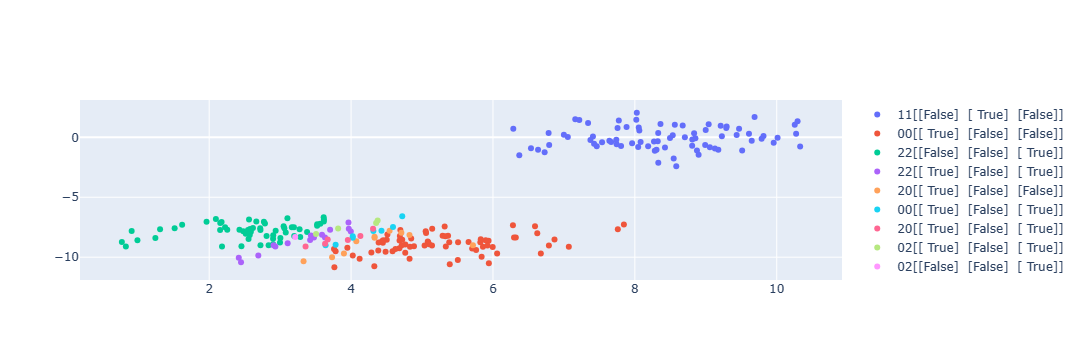

In [90]:
fig = go.Figure()

for i,s in tmp.color.value_counts().items():
    
    fig.add_trace(go.Scatter(x=tmp.loc[:,1][tmp.color == i],
                         y=tmp.loc[:,0][tmp.color == i],
                         name = str(i),    
                         mode = "markers" ))
fig.show()